In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
def concat_images(images):
    spacer = np.ones([16, 1], dtype=np.float32) * -0.15
    images_with_spacers = []

    image_size = len(images)

    for i in range(image_size):
        images_with_spacers.append(images[i])
        if i != image_size - 1:
            # Add 1pixel space
            images_with_spacers.append(spacer)
    ret = np.hstack(images_with_spacers)
    return ret


def concat_images_in_rows(images, row_size):
    column_size = len(images) // row_size
    spacer_h = np.ones(
        [1, 16 * column_size + column_size - 1], dtype=np.float32) * -0.15

    row_images_with_spacers = []

    for row in range(row_size):
        row_images = images[column_size * row:column_size * row + column_size]
        row_concated_images = concat_images(row_images)
        row_images_with_spacers.append(row_concated_images)

        if row != row_size - 1:
            row_images_with_spacers.append(spacer_h)

    ret = np.vstack(row_images_with_spacers)
    return ret

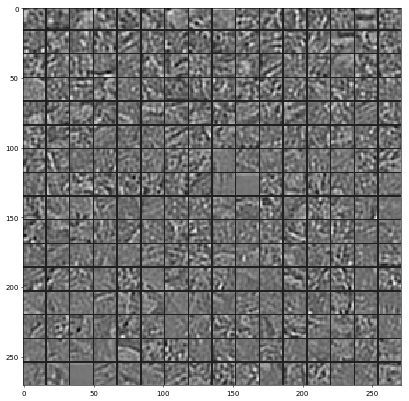

In [4]:
dir_name = "saved"
file_path = os.path.join(dir_name, "weight.npz")
weight_data = np.load(file_path)

W = weight_data["W"]

ws = []
for j in range(16):
    for i in range(16):
        w = W[i + 16*j].reshape(16, 16)
        ws.append(w)    

tmp = concat_images_in_rows(ws, 16)

plt.figure(figsize=(10, 10), dpi=50)
plt.imshow(tmp, cmap='gray')
#plt.colorbar()
plt.show()